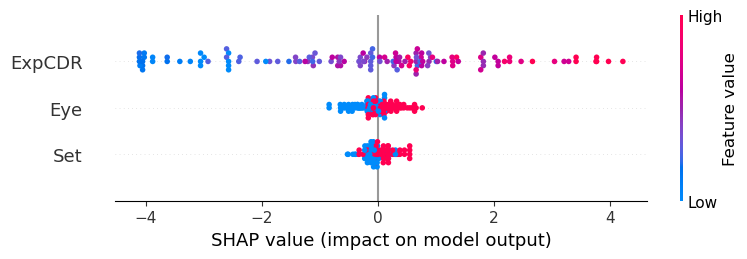

In [11]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv("glaucoma.csv")

# Encode categorical features
le_eye = LabelEncoder()
df['Eye'] = le_eye.fit_transform(df['Eye'])

le_set = LabelEncoder()
df['Set'] = le_set.fit_transform(df['Set'])

# Define features and label
X = df.drop(columns=['Filename', 'Glaucoma'])  # drop non-feature and label columns
y = df['Glaucoma']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (XGBoost)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [17]:
import numpy as np
np.shape(shap_values.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'